# K - Nearest Neighbors

K - Nearest Neighbors is a non-parametric, instance based algorithm which is generally used for classification purposes. The algorithm is quite simple and intuitive and in the following code, we write the entire algorithm from scratch and use it for the popular iris data set. We also compare our results with the results obtained from Python's Scikit Learn library.

In [2]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url,names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class'])

In [6]:
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.info()# There is no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_Length    150 non-null float64
Sepal_Width     150 non-null float64
Petal_Length    150 non-null float64
Petal_Width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


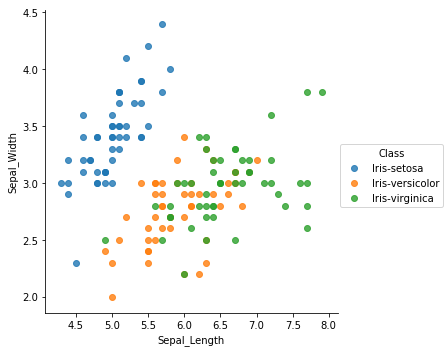

In [11]:
# Doing some exploratory data analysis
sns.lmplot(x = 'Sepal_Length',y = 'Sepal_Width',data = data,hue = 'Class',fit_reg=False)

In [12]:
# We see that Iris-setosa is quite well separated from the other two species

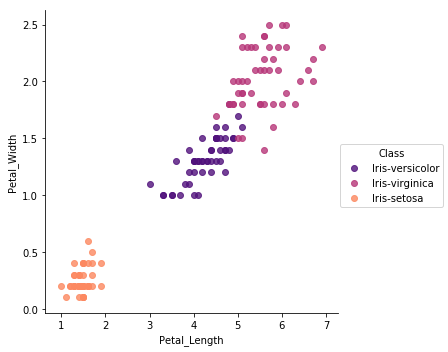

In [42]:
sns.lmplot(x = 'Petal_Length',y = 'Petal_Width',data = data,hue = 'Class',fit_reg=False,palette = 'magma')

In [14]:
# Again Iris_setosa is well separated. Additionally, the remaining two species are also well separated when we use
# petal lengths and petal widths as features

In [15]:
# Let us make all the possible scatter plots

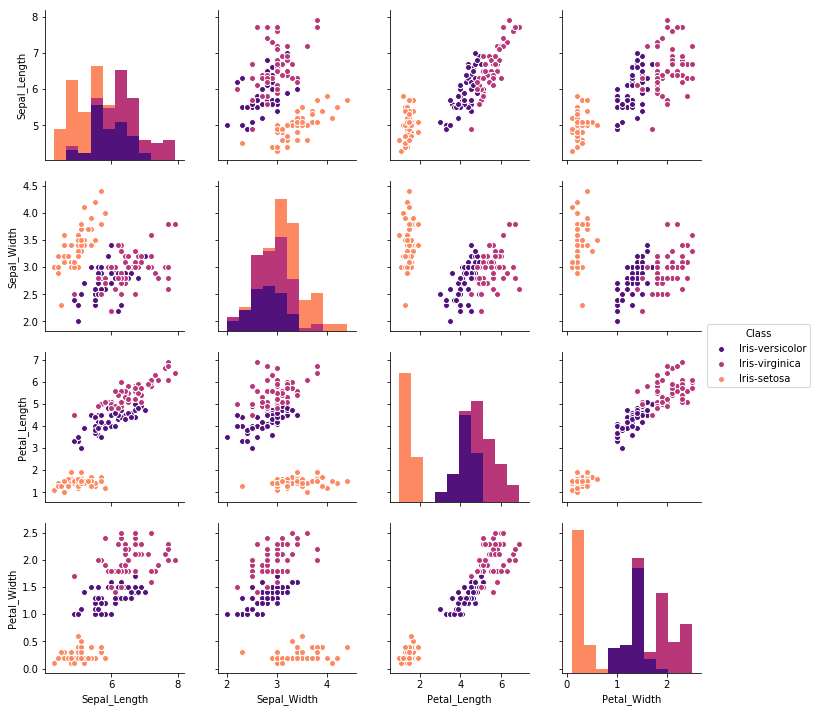

In [38]:
sns.pairplot(data=data,hue='Class',palette = 'magma')

In [17]:
# Let us also divide the data set into a training and testing set even though there are only 150 entries.

In [20]:
data = data.sample(frac=1).reset_index(drop=True) # We are reshuffling the entire data set

In [46]:
test = data.iloc[120:,:]

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 120 to 149
Data columns (total 5 columns):
Sepal_Length    30 non-null float64
Sepal_Width     30 non-null float64
Petal_Length    30 non-null float64
Petal_Width     30 non-null float64
Class           30 non-null object
dtypes: float64(4), object(1)
memory usage: 1.3+ KB


In [48]:
train = data.iloc[0:120,:]

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
Sepal_Length    120 non-null float64
Sepal_Width     120 non-null float64
Petal_Length    120 non-null float64
Petal_Width     120 non-null float64
Class           120 non-null object
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


## Self KNN Implementation

In [52]:
# We can define a function for the algorithm and we will pass the test point as an argument to this function

In [214]:
def KNN(x_test,K):
    # We need to traverse over the entire training data set
    S_len = (train['Sepal_Length']-x_test['Sepal_Length'])**2
    S_wid = (train['Sepal_Width']-x_test['Sepal_Width'])**2
    P_len = (train['Petal_Length']-x_test['Petal_Length'])**2 
    P_wid = (train['Petal_Width']-x_test['Petal_Width'])**2 
    Euclid = (S_len + S_wid + P_len + P_wid)**0.5
    d = pd.concat([pd.DataFrame({'Euclidean':Euclid}),train['Class']],axis=1)
    sorted = d.sort_values('Euclidean')
    sorted = sorted.reset_index(drop=True)
    pred = sorted['Class'].iloc[0:K].value_counts().idxmax()
    return(pred)

In [215]:
K = 7 # Number of neighbors from which the Euclidian distance of the test point will be calculated
pred_label = KNN(test.iloc[25,:],K)
print(test.iloc[25,:])

Sepal_Length               5.6
Sepal_Width                2.8
Petal_Length               4.9
Petal_Width                  2
Class           Iris-virginica
Name: 145, dtype: object


In [216]:
print(pred_label)

Iris-virginica


In [198]:
# Running over the entire test set

In [200]:
test.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
120,7.4,2.8,6.1,1.9,Iris-virginica
121,5.1,3.4,1.5,0.2,Iris-setosa
122,4.7,3.2,1.3,0.2,Iris-setosa
123,6.2,2.2,4.5,1.5,Iris-versicolor
124,5.9,3.0,4.2,1.5,Iris-versicolor


In [218]:
g = 0
for item in test.index:
    label = KNN(test.loc[item,:],K)
    if label == test.loc[item,:]['Class']:
        g = g+1
print(g/30)

0.9333333333333333


## KNN Implementation using Scikit-Learn